In [1]:
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

#own modules
from evaluation.utils import db, user_input, significant_digits
from evaluation.processing import tools_ec
from evaluation.visualization import plot

'done'

<IPython.core.display.Javascript object>

'done'

Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 3 
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Read data from "data_eis_analysis" ...
SELECT * FROM data_eis_analysis WHERE (`id_exp_sfc`) IN (7479);
Done in  0:00:00.021380
 Control quality of HFR extraction: 


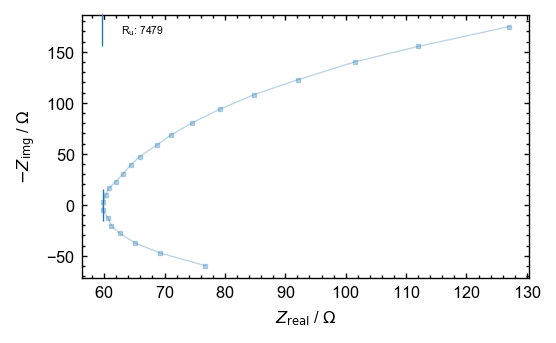

Matched experiment performed  56.65156666666667 min  earlier
Updated exp_ec with index: 7458 with ec_R_u_postdetermined__ohm= 59.8406  from id_exp_sfc= 7479
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Read data from "data_eis_analysis" ...
SELECT * FROM data_eis_analysis WHERE (`id_exp_sfc`) IN (7479);
Done in  0:00:00.021057
 Control quality of HFR extraction: 


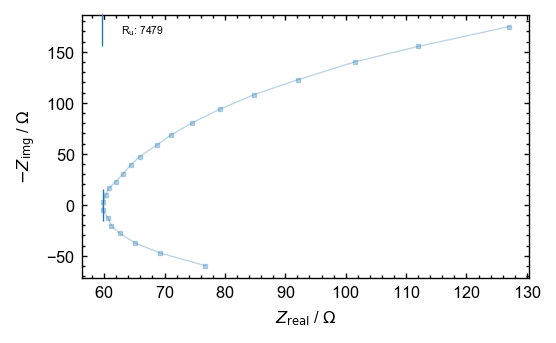

Matched experiment performed  54.9701 min  earlier
Updated exp_ec with index: 7459 with ec_R_u_postdetermined__ohm= 59.8406  from id_exp_sfc= 7479
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Read data from "data_eis_analysis" ...
SELECT * FROM data_eis_analysis WHERE (`id_exp_sfc`) IN (7479);
Done in  0:00:00.021360
 Control quality of HFR extraction: 


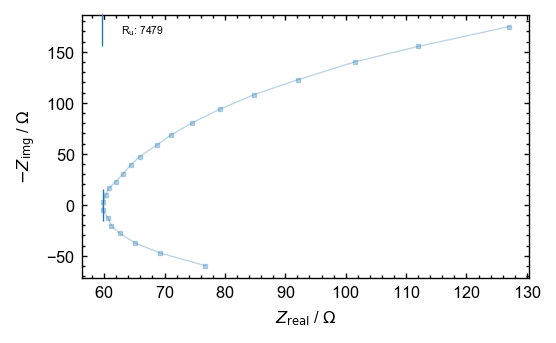

Matched experiment performed  41.15555 min  earlier
Updated exp_ec with index: 7460 with ec_R_u_postdetermined__ohm= 59.8406  from id_exp_sfc= 7479
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Read data from "data_ec_analysis" ...
SELECT * FROM data_ec_analysis WHERE (`id_exp_sfc`) IN (7458, 7459, 7460);
Done in  0:00:00.257380
SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2, fc_top_name_flow_cell_A_opening_ideal__mm2, fc_top_name_flow_cell_A_opening_real__mm2, fc_top_id_sealing_A_opening__mm2, fc_top_id_PTL_A_PTL__mm2, fc_bottom_name_flow_cell_A_opening_ideal__mm2, fc_bottom_name_flow_cell_A_opening_real__mm2, fc_bottom_id_sealing_A_opening__mm2, fc_bottom_id_PTL_A_PTL__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (7458, 7459, 7460);
Read data from "exp_icpms_sfc_expanded" ...
SELECT * FROM exp_icpms_sfc_expanded WHE

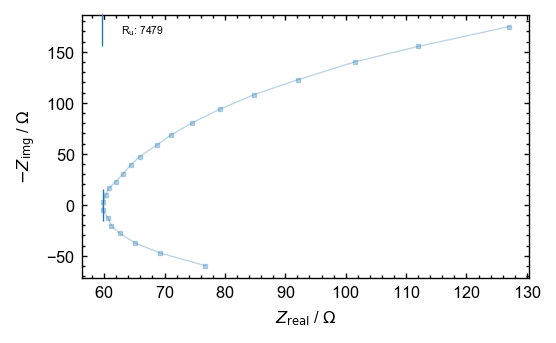

Matched experiment performed  9.887383333333334 min  earlier
Updated exp_ec with index: 7474 with ec_R_u_postdetermined__ohm= 59.8406  from id_exp_sfc= 7479
Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 1 
Read data from "data_ec" ...
SELECT * FROM data_ec WHERE (`id_exp_sfc`) IN (7474) AND cycle IN (2);
Done in  0:00:00.026267
 This is just a basic implementation of ECSA calculation for single CV cycle on Pt with constant capacitive current correction in acidic electrolyte. Be aware analysis procedure need to be adjusted for different electrode material, electrolyte, ... 


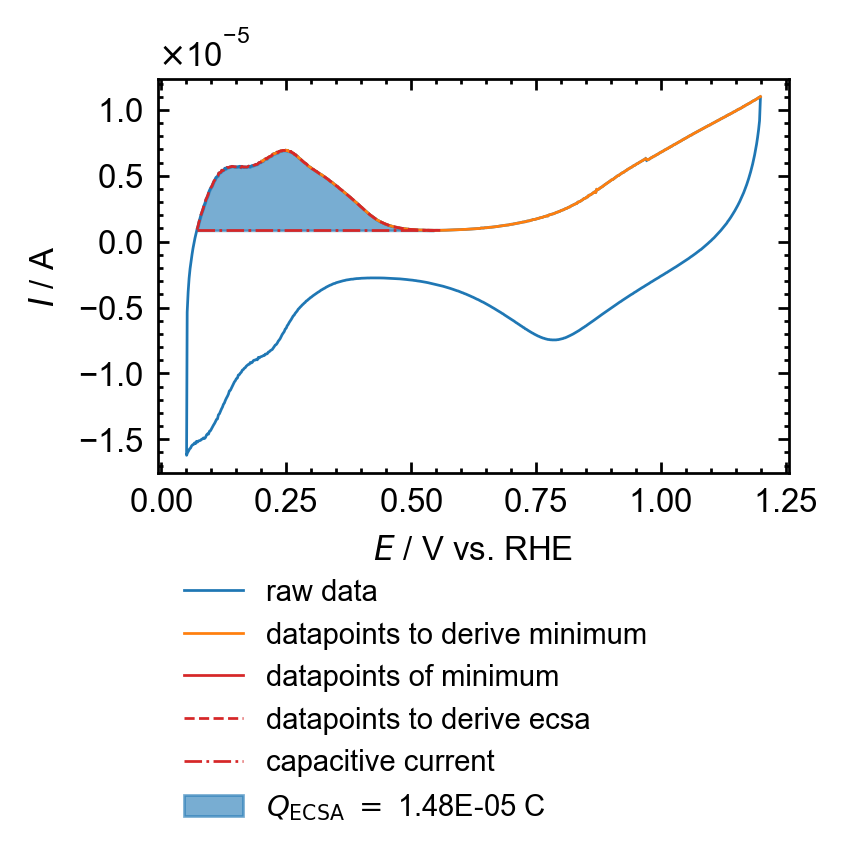

Added snychronized timestamp column:  Timestamp_synchronized__s
Added snychronized timestamp column:  t_delaycorrected__timestamp_sfc_pc_synchronized__s
Read data from "exp_ec_datasets_definer" ...
SELECT * FROM exp_ec_datasets_definer WHERE (`id_exp_sfc`) IN (7458, 7459, 7460);
Done in  0:00:00.020247
Read data from "exp_icpms_integration_expanded" ...
SELECT * FROM exp_icpms_integration_expanded WHERE (`id_exp_ec_dataset`) IN (143);
Done in  0:00:00.023848
[(143,)] [(404, 'Pt195', 'Re185')]
[((143,), (404, 'Pt195', 'Re185'))]
Read data from "ana_icpms_sfc_fitting" ...
SELECT * FROM ana_icpms_sfc_fitting WHERE (`id_exp_icpms`, `name_isotope_analyte`, `name_isotope_internalstandard`, `id_exp_ec_dataset`, `id_fit`) IN ((404, 'Pt195', 'Re185', 143, 0));
Done in  0:00:00.023224
Link selected experiments to publication:  HTE02_Database
 For table ana_icpms_sfc_fitting : inserted new experiments = 0 , skipped existing experiments = 1 


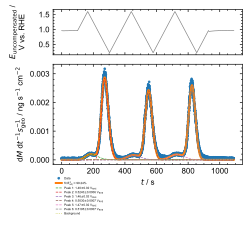

Read data from "ana_icpms_sfc_fitting_peaks" ...
SELECT * FROM ana_icpms_sfc_fitting_peaks WHERE (`id_exp_icpms`, `name_isotope_analyte`, `name_isotope_internalstandard`, `id_exp_ec_dataset`, `id_fit`) IN ((404, 'Pt195', 'Re185', 143, 0));
Done in  0:00:00.024231
0.0006434967537127288 75.278198 386.183471
1.44 V vs. RHE
(0.15158615044720902, 1.669081119568087)
 File  20231011_processing_correlation.svg  already exists 


In [ ]:
## EC data
exp_ec = db.get_exp('''SELECT *
                     FROM exp_ec_expanded
                     WHERE name_user="n.roettcher"
                        AND name_setup_sfc = "SFC_1"
                        AND DATE(t_start__timestamp) = "2023-10-06"
                      
                        # if known simply select experiments by number of performed batch
                        AND id_ML = 55 

                        # alternatively define by other metadata
                        AND fe_top_id_pump_out_manufacturer = 'Agilent' # Experiments with online ICP-MS
                        #AND ec_name_technique="exp_ec_cv"
                        #AND cv_scanrate__mV_s = 10
                        #AND ROUND(cv_E_apex1__VvsRE + ec_E_RE__VvsRHE, 1) = 1.6 # or 1.2
                        ;''', )#.iloc[:4]

#print(exp_ec)
exp_ec = tools_ec.update_R_u__ohm(exp_ec, match_eis_id_ML=61, user_control=False) # derive uncompensated resistance from EIS experiment performed in id_ML=61

data_ec = db.get_data(exp_ec,'data_ec_analysis')
data_ec = tools_ec.compensate_R_u(exp_ec, data_ec) # calculate compensated potentials
data_ec = tools_ec.geometric_current(exp_ec, data_ec, geo_cols='fc_top_name_flow_cell_A_opening_ideal__mm2') # calculate geometric current density
exp_ec, data_ec = tools_ec.gravimetric_current(exp_ec,data_ec)
#exp_ec, data_ec = tools_ec.derive_ECSA(exp_ec, data_ec, method='Pt_Hupd_horizontal', geo_cols='fc_top_name_flow_cell_A_opening_ideal__mm2')


## ICP-MS data
match_ec_icpms = db.match_exp_sfc_exp_icpms(exp_ec)
exp_icpms = db.get_exp(match_ec_icpms, 'exp_icpms_sfc_expanded',
                       groupby_col=['id_exp_icpms'], 
                       index_col=['id_exp_icpms', 'name_isotope_analyte', 'name_isotope_internalstandard',])
data_icpms = db.get_data(match_ec_icpms, 
                         'data_icpms_sfc_analysis', 
                         join_cols=['id_exp_icpms'],
                         index_cols=['id_exp_icpms', 'name_isotope_analyte', 'name_isotope_internalstandard', 'id_data_icpms'], 
                         add_data_without_corresponding_ec=False)


# derive specific surface from CV recorded later corrected catalyst dissolution
exp_ec_ecsa, data_ec_ecsa = tools_ec.get_derived_ECSA(sql_ec='''SELECT  *
                                                        FROM hte_data.exp_ec_expanded 
                                                        WHERE name_user="n.roettcher"
                                                            AND name_setup_sfc = "SFC_1"
                                                            AND DATE(t_start__timestamp) = "2023-10-06"
                                                            AND fe_top_id_pump_out_device = 'SFC' # not connected to ICP-MS
                                                            AND fe_top_pump_rate_out__rpm = 0 # no electrolyte flow
                                                            AND ec_name_technique="exp_ec_cv"
                                                            AND cv_scanrate__mV_s = 100
                                                            AND ROUND(cv_E_apex1__VvsRE + ec_E_RE__VvsRHE, 1) = 1.2 # or 1.6
                                                        ;
                                                        ''',
                                             cycle=2,
                                             match_eis_id_ML = 61,
                                             user_control_eis=False,
                                             method='Pt_Hupd_horizontal',)
exp_ec.loc[:, 'A_spec__m2'] = exp_ec_ecsa.A_spec__m2.iloc[0]
geo_value__m2 = data_icpms.join(exp_ec.loc[:, 'A_spec__m2'], on='id_exp_sfc').loc[:, 'A_spec__m2']
data_icpms.loc[:, 'dm_dt_S__ng_s_cm2spec'] = data_icpms.loc[:, 'dm_dt__ng_s'] / (geo_value__m2 *1e4)


data_ec, data_icpms = plot.synchronize_timestamps(data_ec=data_ec, 
                                                    data_icpms=data_icpms,
                                                    timestamp_col_ec='Timestamp',
                                                    timestamp_col_icpms='t_delaycorrected__timestamp_sfc_pc')

# Get corresponding stored integration results
exp_ec_datasets = db.get_data(exp_ec,'exp_ec_datasets_definer') # get defined datasets on which integrations has been performed
exp_icpms_integration = db.get_data(exp_ec_datasets.groupby('id_exp_ec_dataset').first(), 'exp_icpms_integration_expanded') # get results from integrations for each dataset




# Peak Fitting results
ana_icpms_sfc_fitting = db.get_ana_icpms_sfc_fitting(exp_ec, exp_icpms, id_fit=0)
ana_icpms_sfc_fitting_peaks = db.get_data(ana_icpms_sfc_fitting, name_table='ana_icpms_sfc_fitting_peaks')
ana_icpms_sfc_fitting_peaks = ana_icpms_sfc_fitting_peaks.loc[ana_icpms_sfc_fitting_peaks.fit_type=='sum']

# Define anodic and cathodic peak
ana_icpms_sfc_fitting_peaks.loc[ana_icpms_sfc_fitting_peaks.mode_potential__VvsRHE > 1, 'peak_type'] = 'anodic'
ana_icpms_sfc_fitting_peaks.loc[ana_icpms_sfc_fitting_peaks.mode_potential__VvsRHE < 1, 'peak_type'] = 'cathodic'

# Average potential values for the three peaks each
ana_icpms_sfc_fitting_peaks_avg = ana_icpms_sfc_fitting_peaks.groupby(['id_fit', 'peak_type'])[['mode_potential__VvsRHE']].mean()\
                           .join(ana_icpms_sfc_fitting_peaks.groupby(['id_fit', 'peak_type'])['mode_potential__VvsRHE'].std(), rsuffix='_std')


name='20231011_processing_correlation'


with plt.rc_context(plot.get_style(style='singleColumn',
                                   fig_size={'width':6, 'height':4},
                                   add_margins_and_figsize= {'left': 0.1,  },
                                    add_margins= {'left': 0.5,},
                                  #interactive =True,
                                  )):
    plot_storage = plot.PlotDataStorage(name, overwrite_existing=True)
    
    fig = plt.figure()
    
    
    
    gs = gridspec.GridSpec(2, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)


    #Hide xaxis label on ax1
    for ax in [ax1]:
        plt.setp(ax.get_xticklabels(), visible=False)
    
    exp_ec.dataset\
                    .plot(x_col='Timestamp_synchronized__s',
                         y_col='E_WE__VvsRHE',
                          ax=ax1,
                         data=data_ec,   
                          color='tab:grey',
                    )

    name_analysis_selected = ['cyc1_anodic', 'cyc1_cathodic']
    integrations_selected = exp_icpms_integration.loc[exp_icpms_integration.name_analysis.isin(name_analysis_selected)]
    data_icpms_integrated_datapoints = data_icpms.loc[data_icpms.index.get_level_values(level='id_data_icpms')\
                                             .isin(sum([list(range(row.id_data_integration_icpms_begin, 
                                                                     row.id_data_integration_icpms_end, 1)
                                                            )
                                                     for index, row  in integrations_selected.iterrows()], 
                                                         []
                                                        )
                                                    )
                                             ]
    exp_icpms.loc[:, 'integration_baseline'] = list(set([data_icpms.loc[data_icpms.index.get_level_values(level='id_data_icpms')\
                                                                 .isin((range(row.id_data_integration_icpms_baseline 
                                                                                           - int(row.no_of_datapoints_av_icpms/2), 
                                                                                        row.id_data_integration_icpms_baseline 
                                                                                           + int(row.no_of_datapoints_av_icpms/2), 1)
                                                                                )
                                                                        )
                                                                 ].dm_dt_S__ng_s_cm2spec.mean()
                                                        for index, row  in integrations_selected.iterrows()]))
    exp_icpms.dataset\
                    .plot(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized__s',
                         y_col='dm_dt_S__ng_s_cm2spec',
                          ax=ax2,
                         data=data_icpms,  
                          marker='.',
                          markersize=0.5,
                          linestyle='',
                          color='tab:blue',
                    )\
                    .fill_between(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized__s',
                         y_col='dm_dt_S__ng_s_cm2spec',
                          y2_col=exp_icpms.integration_baseline.iloc[0],
                          ax=ax2,
                         data=data_icpms_integrated_datapoints,  
                          linestyle='-',
                          color='tab:blue',
                          alpha=0.3
                    )\
                    .hlines(y_col='integration_baseline',
                           xmin=data_icpms_integrated_datapoints.t_delaycorrected__timestamp_sfc_pc_synchronized__s.min(),
                            xmax=data_icpms_integrated_datapoints.t_delaycorrected__timestamp_sfc_pc_synchronized__s.max(),
                            linestyle='--',
                           )

    ax1.set_xlabel('')
    ax1.set_ylabel('$E$ / \nV vs. RHE')
    ax2.set_ylabel('d$m$ d$t^{-1}$ $S^{-1}$ / \nng s$^{-1}$ cm$_\mathrm{Pt}^{-2}$')
    fig.align_ylabels([ax1, ax2])

    ax2.annotate('$m_\mathrm{Pt, dissolved}$\n   = '+str(significant_digits.round_half_up(integrations_selected.m_dissolved_trapz__ng.sum(), decimals=2))+' ng',#'dissolved \nPlatinum', 
             xy=(270, 0.01), 
             xytext=(-30, 0.035),
             xycoords='data',
             fontsize=6,
             arrowprops=dict(arrowstyle='-',lw=0.8,
                             relpos=(0.5,1),
                            ),
             va='center_baseline'
        )
    
    peak_anodic_time = ana_icpms_sfc_fitting_peaks.loc[ana_icpms_sfc_fitting_peaks.index.get_level_values(level='id_peak')==5, 'mode__s'].iloc[0]#fitting_result.loc[('5', 'mode'), 'Value']
    peak_cathodic_time = ana_icpms_sfc_fitting_peaks.loc[ana_icpms_sfc_fitting_peaks.index.get_level_values(level='id_peak')==6, 'mode__s'].iloc[0]#fitting_result.loc[('6', 'mode'), 'Value']
    peak_anodic_potential = ana_icpms_sfc_fitting_peaks_avg.loc[ana_icpms_sfc_fitting_peaks_avg.index.get_level_values(level='peak_type')=='anodic', 'mode_potential__VvsRHE'].iloc[0]#fitting_result_avg.loc[('mode potential', 'anodic'), 'Value']
    peak_cathodic_potential = ana_icpms_sfc_fitting_peaks_avg.loc[ana_icpms_sfc_fitting_peaks_avg.index.get_level_values(level='peak_type')=='cathodic', 'mode_potential__VvsRHE'].iloc[0]#fitting_result_avg.loc[('mode potential', 'cathodic'), 'Value']

    print(str(user_input.truncate(peak_anodic_potential, decimals=2))
                 +' V vs. RHE')
    ax1.annotate('$E_\mathrm{anodic}$\n= '+
                 str(user_input.truncate(peak_anodic_potential, decimals=2))
                 +' V',
             xy=(peak_anodic_time, peak_anodic_potential), 
             xytext=(7,0),
             xycoords='data',
             textcoords='offset points',
             fontsize=6,
             arrowprops=dict(arrowstyle='->',lw=0.8,
                             relpos=(0.0,0.58),
                             shrinkA=20,
                             shrinkB=20,
                            ),
             va='center_baseline'
        )
    ax1.annotate('$E_\mathrm{cathodic}$\n= '+
                 str(user_input.truncate(peak_cathodic_potential, decimals=2))
                 +' V',
             xy=(peak_cathodic_time, peak_cathodic_potential), 
             xytext=(10,0),
             xycoords='data',
             textcoords='offset points',
             fontsize=6,
             arrowprops=dict(arrowstyle='->',lw=0.8,
                             relpos=(0,0.58),
                             shrinkA=20,
                             shrinkB=20,
                            ),
             va='center_baseline'
        )
    
    ax1_ylim= ax1.get_ylim()
    ax2_ylim= ax2.get_ylim()
    print(ax1_ylim)
    ax1.vlines(x=peak_anodic_time,
              ymin=ax1_ylim[0],
              ymax=peak_anodic_potential,
              color='black',
              linestyle='--',)
    ax2.vlines(x=peak_anodic_time,
              ymin=ax2_ylim[0],
              ymax=ax2_ylim[1],
              color='black',
              linestyle='--',)
    ax1.vlines(x=peak_cathodic_time,
              ymin=ax1_ylim[0],
              ymax=peak_cathodic_potential,
              color='black',
              linestyle='--',)
    ax2.vlines(x=peak_cathodic_time,
              ymin=ax2_ylim[0],
              ymax=ax2_ylim[1],
              color='black',
              linestyle='--',)
    
    ax1.set_ylim(ax1_ylim)
    ax2.set_ylim(ax2_ylim)
    
    text_dict = dict(x=0.97, y=0.9, 
                     ha='right',
                     va='top',
                     fontsize=8,
                    )
    
    ax1.text(s='EC', **text_dict, transform=ax1.transAxes)
    ax2.text(s='ICP-MS', **text_dict, transform=ax2.transAxes)
    
    
    
    
    plot_storage.export(fig,)
    plt.show()


